# Introduction to Regression with Neural network in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variablebased on some other combination of variables, even shorter... predictiing a number

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Import tensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Create data to view and fit


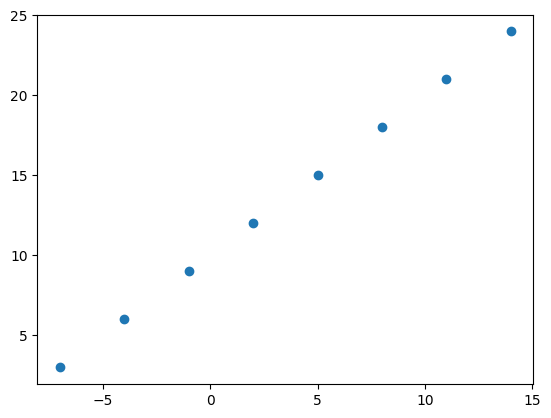

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)
#

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our numpy arrays into tensors with dtype float32

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

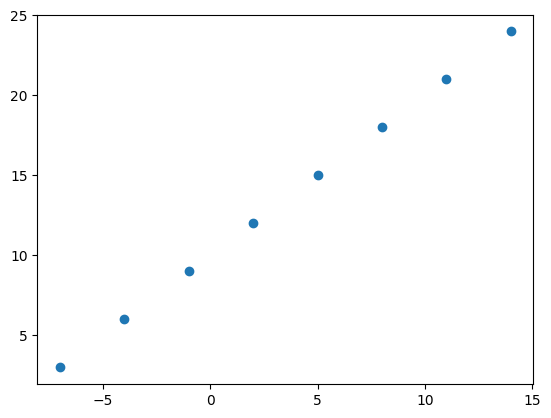

In [13]:
plt.scatter(X, Y)

## Steps in modelling with tensorflow


1. #Creating a model# - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our
model how to improve the patter+s its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,   # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stocrastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - loss: 15.3602 - mae: 15.3602
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 15.0789 - mae: 15.0789
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 14.8576 - mae: 14.8576
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 14.7251 - mae: 14.7251
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 14.5926 - mae: 14.5926


In [15]:
#Check out X and Y

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model

Y_pred = model.predict(tf.constant([17.0]))
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[-4.8369927]], dtype=float32)

In [17]:
Y_pred + 11

array([[6.1630073]], dtype=float32)

### IMPROVE OUR MODEL
- Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen
layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples
to learn from).



In [18]:
# LETS REBUILD OUR MODEL

#1. Create the model


model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) # 1 layer

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 20.9699 - mae: 20.9699
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 20.5828 - mae: 20.5828
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 20.3016 - mae: 20.3016
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 20.0203 - mae: 20.0203
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 19.7391 - mae: 19.7391
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 19.4578 - mae: 19.4578
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 19.1766 - mae: 19.1766
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 18.8953 - mae: 18.8953
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.6141 - mae: 18.6141
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 18.3328 - mae: 18.3328
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 18.0516 - mae: 18.0516
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 17.7703 - mae: 17.7703
Epoch 13/100
1/1 ━━━━━━━

In [19]:
# Remind ourselves of the data

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Lets see if our model's prediction has improved

Y_pred = model.predict(tf.constant([17.0]))
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[29.366983]], dtype=float32)

In [21]:
# Let's see if we can make another change to improve our model

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4819 - mae: 12.4819
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.6253 - mae: 11.6253
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7756 - mae: 10.7756
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.9192 - mae: 9.9192
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.1604 - mae: 9.1604
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.4917 - mae: 8.4917
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.8051 - mae: 7.8051
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 7.0945 - mae: 7.0945
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6.3590 - mae: 6.3590
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.5938 - mae: 5.5938
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.7907 - mae: 4.7907
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4.0303 - mae: 4.0303
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51m

In [22]:
# Let's remind ourselves of the data

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's try to make a prediction
Y_pred = model.predict(tf.constant([17.0]))
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[27.405323]], dtype=float32)

### Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:
Build a model → fit it → evaluate it → tweak a model → fit it → evaluate it → tweak a model → fit it → evaluate it...




When it comes to evaluation... there are 3 words you should memorize:
"Visualize, visualize, visualize"

It's a god idea to visualize:
* The data - what data are we working with? What does it lok like?
* The model  itself - waht does our model look like?
* The training of a model – how does a model perform while it learns?
* The predictions of the model – how do the predictions of a model line up against the ground truth (the original labels)






In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [26]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

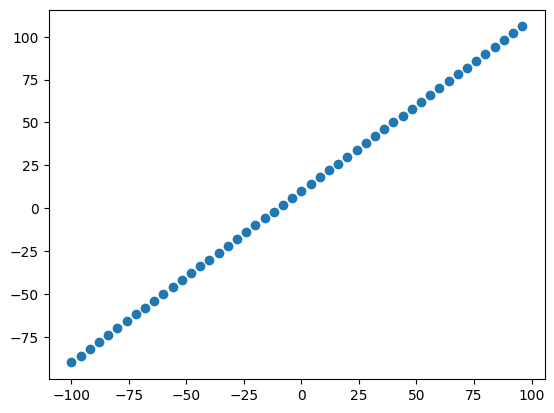

In [27]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets ....

* The trainning set - the model learns from this data, wich is typically 70 - 80% of the total data you have available.
* Validation set – the model gets tuned on this data, which is typically 10–15% of the data available.
* Test set – the model gets evaluated on this data to test what is has learned, this set is typically 10–15% of the total data available.



In [28]:
# Check the length of how many samples we have
len(X)

50

In [29]:
# Split the data into train and test sets
X_Train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_Train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets.... lets visualize it again

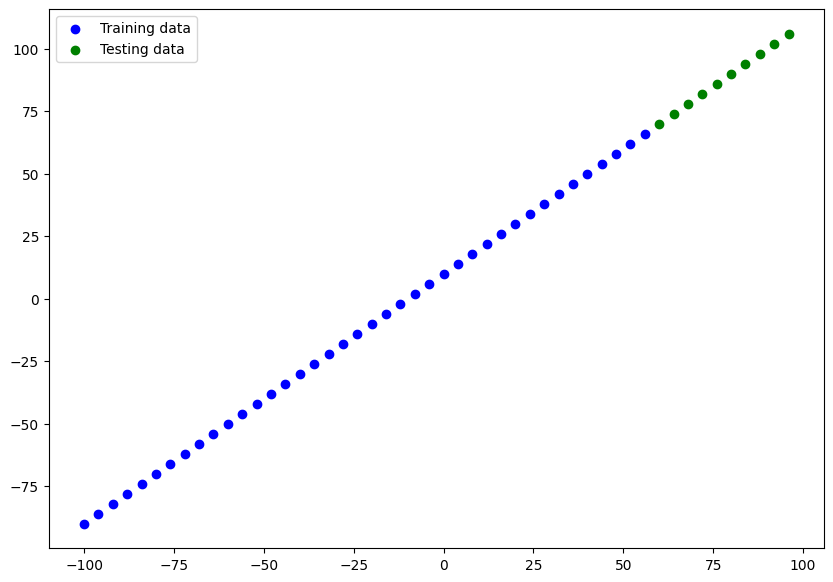

In [30]:
plt.figure(figsize=(10,7))
# plt training data in blue
plt.scatter(X_Train, y_train, c="b", label="Training data")
# plt test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
# Lets have a loot at how to build a neural network for our data


# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model
#model.fit(tf.expand_dims(X_Train, axis=-1), y_train, epochs=5)

### Visualizing the model



In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [34]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#Create a model (same as above)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
  ], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - total number of parameters in the model
* TRainable parameters - these are the parameters (patterns the model ca update as it trains)
* Non-trainable parameters - these are parameters (patterns the model doesn't update as it trains) - this is typical when you bring in already learn patterns or parameters from others models during transfer learning)

In [36]:
#3. Fit the model
model.fit(tf.expand_dims(X_Train, axis=-1), y_train, epochs=200, verbose=0) # verbose=0 no outputs

In [37]:
#get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

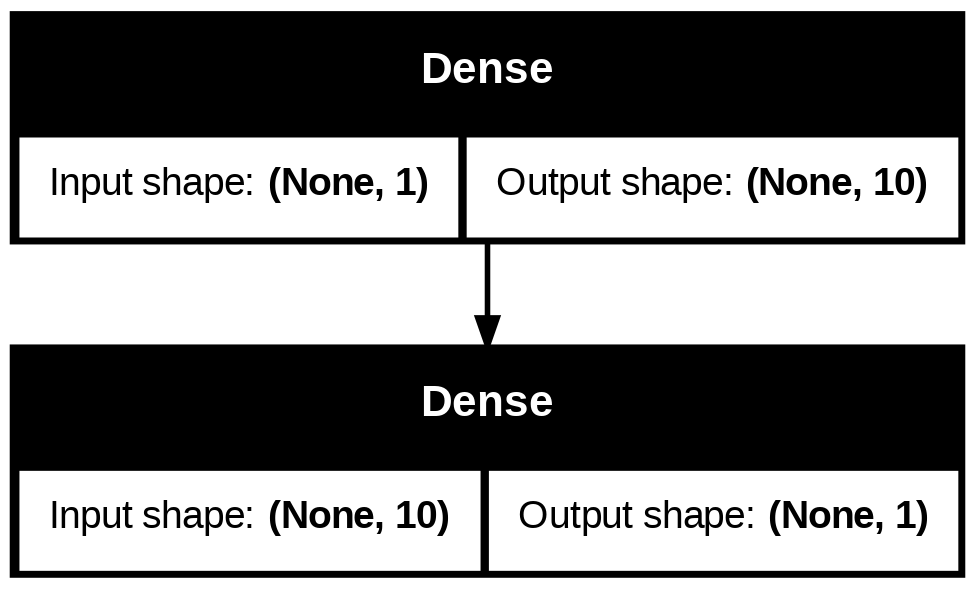

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

*



### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [39]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[36.774593],
       [39.031586],
       [41.288574],
       [43.54557 ],
       [45.80256 ],
       [48.059547],
       [50.316536],
       [52.573532],
       [54.83052 ],
       [57.087513]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
#Let's create a plotting function
def plot_predicitions(train_data=X_Train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

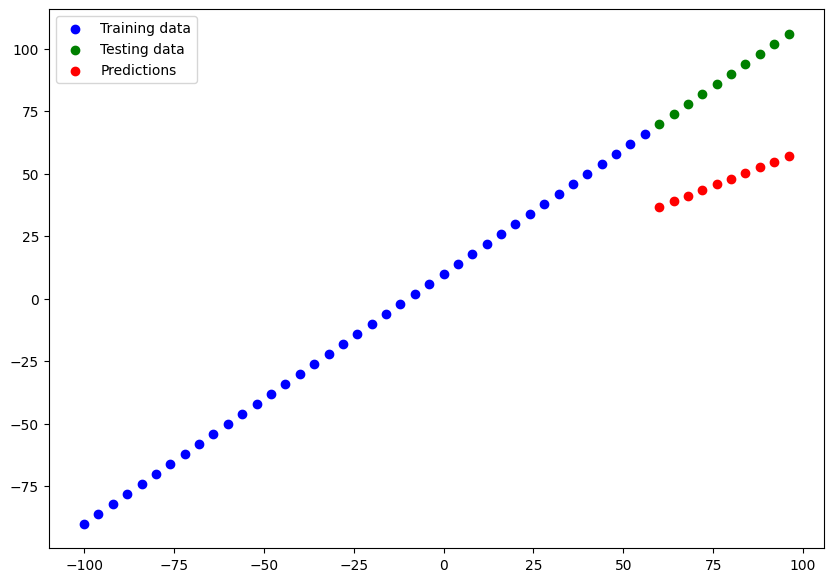

In [42]:
plot_predicitions()

### Evaluation our model predictions with regression evaluate
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.


In [43]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 41.0689 - mae: 41.0689


[41.068946838378906, 41.068946838378906]

In [44]:
# Calculate the mean absolute error
# Create an instance of the MeanAbsoluteError metric
mae_metric = tf.keras.metrics.MeanAbsoluteError()

# Update the metric with the true and predicted values
mae_metric.update_state(y_test, y_pred)

# Get the result
mae_value = mae_metric.result().numpy()  # Convert to numpy for easier readability
print("Mean Absolute Error:", mae_value)



Mean Absolute Error: 41.068947


In [45]:
y_pred

array([[36.774593],
       [39.031586],
       [41.288574],
       [43.54557 ],
       [45.80256 ],
       [48.059547],
       [50.316536],
       [52.573532],
       [54.83052 ],
       [57.087513]], dtype=float32)

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[36.774593],
       [39.031586],
       [41.288574],
       [43.54557 ],
       [45.80256 ],
       [48.059547],
       [50.316536],
       [52.573532],
       [54.83052 ],
       [57.087513]], dtype=float32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.774593, 39.031586, 41.288574, 43.54557 , 45.80256 , 48.059547,
       50.316536, 52.573532, 54.83052 , 57.087513], dtype=float32)>

In [48]:
# Save the model using the SavedModel format
model.save("best_model_SavedModel.keras")

In [49]:
# Save the model using the HDF5 format
model.save("best_model_HDF5.h5")

### Saving a model

You can save and load a TensorFlow model using the following methods:
1. The SavedModel format (default)
2. The HDF5 format

In [50]:
# calculate the mean square error
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric


<MeanSquaredError name=mean_squared_error>

In [51]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae_metric.update_state(y_true, y_pred=tf.squeeze(y_pred))
  return mae_metric.result().numpy()

def mse(y_true, y_pred):
  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse_metric.update_state(y_true, tf.squeeze(y_pred))
  return mse_metric.result().numpy()

### Running experiments to improve our model


```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. **Get more data** – get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).  
2. **Make your model larger** (using a more complex model) – this might come in the form of more layers or more hidden units in each layer.  
3. **Train for longer** – give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:
- model_1 – same as the original model, 1 layer, trained for 100 epochs.
- model_2 – 2 layers, trained for 100 epochs. ---- didn't work well, changed some parameter by myself - RelU and 500 epochs
- model_3 – 2 layers, trained for 500 epochs.


** build `model_1`

In [52]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fit the model
model_1.fit(tf.expand_dims(X_Train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 32.3231 - mae: 32.3231 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 27.4712 - mae: 27.4712
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21.4443 - mae: 21.4443
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.8170 - mae: 18.8170
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.6208 - mae: 17.6208
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.9920 - mae: 11.9920
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.8316 - mae: 14.8316
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.5797 - mae: 15.5797
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.6135 - mae: 11.6135
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.5702 - mae: 14.5702
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15.6009 - mae: 15.6009
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.8361 - mae: 11.8361 
Epoch 13/100
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


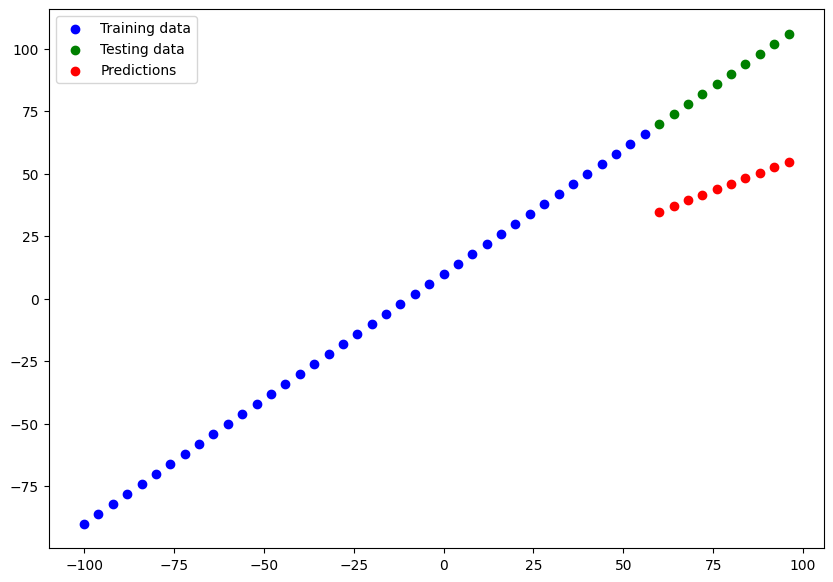

In [53]:
# Make and plot predictions for model_1
y_pred_model_1 = model_1.predict(X_test)
plot_predicitions(predictions=y_pred_model_1)

In [54]:

# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_model_1)
mse_1 = mse(y_test, y_pred_model_1)
mae_1, mse_1

(np.float32(43.12677), np.float32(1886.0426))

** Build `model_2`

In [55]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
#3. Fit the model
model_2.fit(tf.expand_dims(X_Train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 44.9840 - mse: 2984.0559 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.8907 - mse: 170.8536
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 15.9383 - mse: 369.8096
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.4111 - mse: 181.4066
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.2533 - mse: 279.0775
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.4378 - mse: 237.4687
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 16.6448 - mse: 402.3444 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.5205 - mse: 121.3580
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.5531 - mse: 125.1697
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.6179 - mse: 151.4357
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.7277 - mse: 202.2336
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.8169 - mse: 310.3825
Epoch 13/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


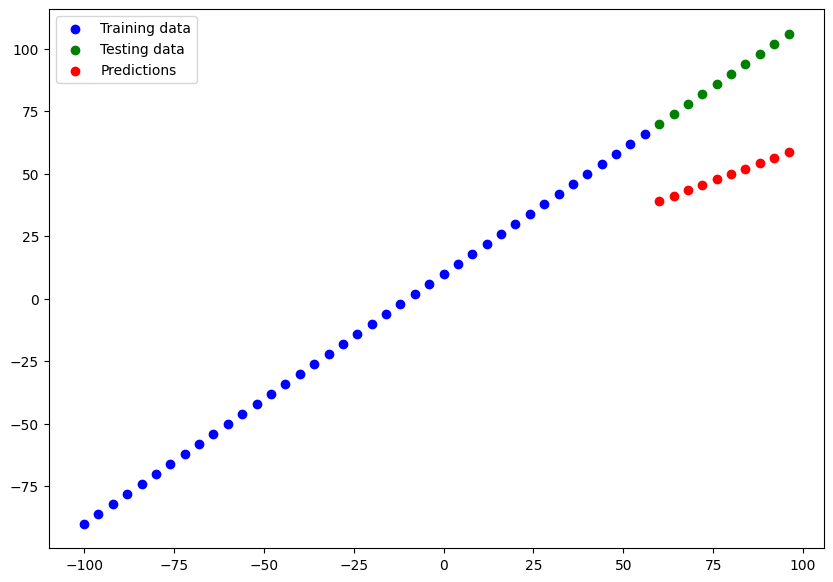

In [56]:
# Make some plot predictions of model_2
y_pred_model_2 = model_2.predict(X_test)
plot_predicitions(predictions=y_pred_model_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_model_2)
mse_2 = mse(y_test, y_pred_model_2)
mae_2, mse_2

(np.float32(39.166943), np.float32(1561.5242))

** Build `model_3`

* 2 layers, trained for 500 epochs

In [58]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fit the model
model_3.fit(tf.expand_dims(X_Train, axis=-1), y_train, epochs=1000)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 27.0590 - mae: 27.0590 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.5486 - mae: 23.5486
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 23.2843 - mae: 23.2843
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.9440 - mae: 14.9440
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.1646 - mae: 19.1646
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.7408 - mae: 13.7408
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.9619 - mae: 14.9619
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.7390 - mae: 15.7390
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.7792 - mae: 11.7792
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.7443 - mae: 14.7443
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.7853 - mae: 15.7853
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.0108 - mae: 12.0108
Epoch 13/100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


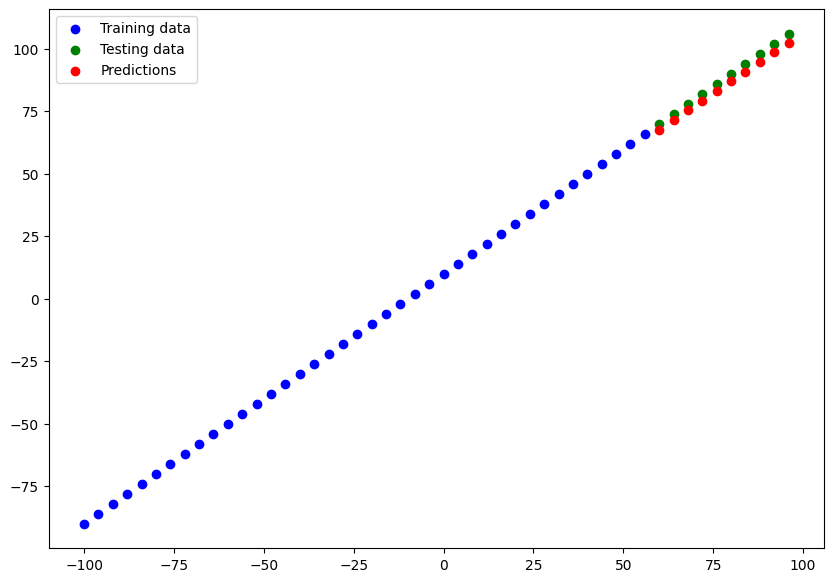

In [59]:
# Make some plot predictions of model_3
y_pred_model_3 = model_3.predict(X_test)
plot_predicitions(predictions=y_pred_model_3)

In [60]:
mae_3 = mae(y_test, y_pred_model_3)
mse_3 = mse(y_test, y_pred_model_3)
mae_3, mse_3

(np.float32(2.9742248), np.float32(8.986043))

### Comparing results
Now we've got results for 3 similar but slightly different results, let's copare then

In [61]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [62]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,43.126770,1886.042603
1,model_2,39.166943,1561.524170
2,model_3,2.974225,8.986043


In [63]:
# saving best model
# Save the model using the SavedModel format
model_2.save("best_model_SavedModel.keras")

In [64]:
# Save the model using the HDF5 format
model_2.save("best_model_HDF5.h5")

### Loading in a saved model

In [65]:
# Load in the Savedmodel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel.keras")
loaded_SavedModel_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
# Compare model_2 predictions with SavedModel format model preditions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

np.True_

In [69]:
model_2_preds.squeeze()

array([39.04517 , 41.220257, 43.39534 , 45.570427, 47.745514, 49.9206  ,
       52.09569 , 54.27078 , 56.44586 , 58.620953], dtype=float32)

In [70]:
loaded_SavedModel_format_preds.squeeze()

array([39.04517 , 41.220257, 43.39534 , 45.570427, 47.745514, 49.9206  ,
       52.09569 , 54.27078 , 56.44586 , 58.620953], dtype=float32)

## DOWNLOAD A MODEL (OR ANY MODEL FILE) FROM GOOGLE
There are two ways to download files:
- Go to the Files tab, right-click on the file you want, and click Download.
- Use code (see the cell below).
- Save it to Google Drive - second cell below



In [71]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_SavedModel.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Save a file from Google Colab to Gogle Drive (requires mounting Google Drive)
!cp best_model_SavedModel.keras "/content/drive/MyDrive/tensorflow_course"
#

In [73]:
! ls /content/drive/MyDrive/tensorflow_course

best_model_SavedModel.keras


###A LARGER EXAMPLE

In [74]:
# Import the required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
# Read in the insurance dataset from kaggle https://www.kaggle.com/datasets/mirichoi0218/insurancemodel
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
# In ML, wee need to convert data in numbers - object type ----> int64
# Let's try one-hot encode our DataFRame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [77]:
# Create a X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [78]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [79]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [80]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [81]:
0.2*1338

267.6

In [82]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [83]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])

#3.Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10129.7910 - mae: 10129.7910
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7652.2837 - mae: 7652.2837
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7602.7715 - mae: 7602.7715
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7743.9370 - mae: 7743.9370
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7342.7671 - mae: 7342.7671
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7656.2715 - mae: 7656.2715
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7891.8193 - mae: 7891.8193
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7617.8491 - mae: 7617.8491
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7268.4209 - mae: 7268.4209
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7443.2710 - mae: 7443.2710
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7533.4478 - mae: 7533.4478
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [84]:
# Chek results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8396.0469 - mae: 8396.0469  


[8385.7265625, 8385.7265625]

In [85]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

## the model isn't perform well, lets improve the model

To try improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [86]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13284.8145 - mae: 13284.8145
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13156.3701 - mae: 13156.3701
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12885.6143 - mae: 12885.6143
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12328.3408 - mae: 12328.3408
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11331.8711 - mae: 11331.8711
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9921.1455 - mae: 9921.1455  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8468.6934 - mae: 8468.6934
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7567.2700 - mae: 7567.2700
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7389.0371 - mae: 7389.0371
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7357.9082 - mae: 7357.9082
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7336.9219 - mae: 7336.9219
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [87]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5021.9492 - mae: 5021.9492  


[4874.1044921875, 4874.1044921875]

In [88]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13237.4785 - mae: 13237.4785
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13050.2734 - mae: 13050.2734
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12676.8779 - mae: 12676.8779
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11965.3857 - mae: 11965.3857
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10801.4004 - mae: 10801.4004
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9352.3477 - mae: 9352.3477
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8054.3130 - mae: 8054.3130
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7467.0073 - mae: 7467.0073
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7382.2993 - mae: 7382.2993
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7357.6938 - mae: 7357.6938
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7335.7314 - mae: 7335.7314
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [89]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3455.4856 - mae: 3455.4856  


[3391.208984375, 3391.208984375]

In [90]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8396.0469 - mae: 8396.0469 


[8385.7265625, 8385.7265625]

Text(0.5, 0, 'epochs')

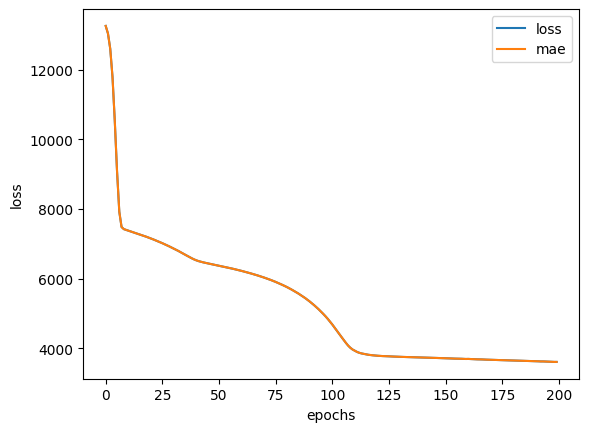

In [91]:
# Plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# ** how long should I training for?

It depends on the problem you're working on. We can check the [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

# Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, ew can borrow a few classes from Scikit-Learn

In [107]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),   # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Fit the column transformer to our data and transform X
ct.fit(X_Train)

# Build our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now X_train and X_test are already transformed
X_train_normal = ct.transform(X_Train)
X_test_normal = ct.transform(X_test)

In [109]:
#How was X_train
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [108]:
# What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [112]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [113]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the Model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])
# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13297.0195 - mae: 13297.0195
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13289.3496 - mae: 13289.3496
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13270.0859 - mae: 13270.0859
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13228.8604 - mae: 13228.8604
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13155.0391 - mae: 13155.0391
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13038.0186 - mae: 13038.0186
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12867.0117 - mae: 12867.0117
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12631.4209 - mae: 12631.4209
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12321.4346 - mae: 12321.4346
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11930.0801 - mae: 11930.0801
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11464.9424 - mae: 11464.9424
Epoch 12/100
34/34 ━━━━━━━━━━━

In [114]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3514.7810 - mae: 3514.7810  


[3428.7890625, 3428.7890625]

In [ ]:
# Insurance model 2 results
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5021.9492 - mae: 5021.9492

In [93]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

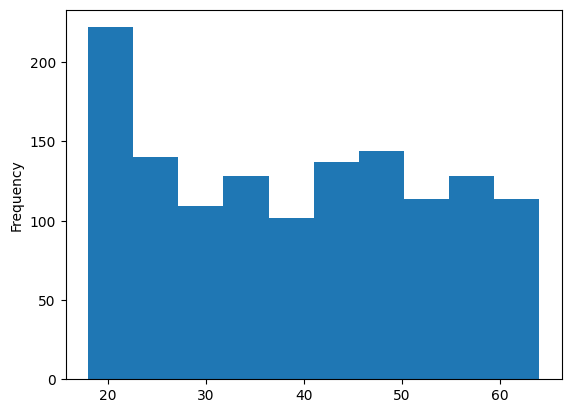

In [94]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

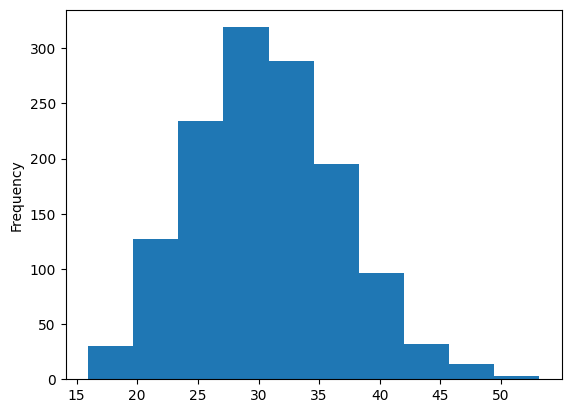

In [95]:
X["bmi"].plot(kind="hist")

In [97]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18
